# Setup

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Set global variables

In [2]:
years = [str(y) for y in range(2001,2018)]
columns = ["Area code", "Area name"] + years
growth_boroughs = ['Greenwich', 'Hackney', 'Newham', 'Tower Hamlets', 'Barking and Dagenham', 'Waltham Forest']

boroughs = ['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston-upon-Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond-upon-Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster']

west_boroughs = list(set(boroughs).difference(set(growth_boroughs)))

## Plot functions

In [3]:
def plot_boroughs(data):
    """
    Plots the growth (6 East London) boroughs
    
    data: pd.DataFrame with following columns (all names as strings):
            Area code, Area name, 2001, 2002, ..., 2016, 2017
    """
    
    plt.xticks(np.arange(0,18),years, rotation=90)
    for borough in growth_boroughs:
        borough_by_year = data[data['Area name'] == borough]
        if borough_by_year.empty:
            continue
        borough_by_year = borough_by_year.drop(['Area code','Area name'], axis=1).values[0]

        plt.plot(borough_by_year, label=borough)
    plt.legend()
    plt.show()

In [4]:
def plot_all_boroughs(data):
    """
    Plots the all boroughs:
        growth_boroughs (6 East London) in thick colourful lines
        west_boroughs (the rest) in thin dotted gray lines
    
    data: pd.DataFrame with following columns (all names as strings):
            Area code, Area name, 2001, 2002, ..., 2016, 2017
    """
    
    plt.xticks(np.arange(0,18),years, rotation=90)
    
    for borough in west_boroughs:
        borough_by_year = data[data['Area name'] == borough]
        if borough_by_year.empty:
            continue
        borough_by_year = borough_by_year.drop(['Area code','Area name'], axis=1).values[0]
        plt.plot(borough_by_year, color='gray', linewidth=1, linestyle=':')
        

    for borough in growth_boroughs:
        borough_by_year = data[data['Area name'] == borough]
        if borough_by_year.empty:
            continue
        borough_by_year = borough_by_year.drop(['Area code','Area name'], axis=1).values[0]
        plt.plot(borough_by_year, label=borough, linewidth=2)
        
    plt.legend()
    plt.show()

# Number of pubs by borough

In [5]:
# load
pubs_units = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs units", skiprows=4, names=columns)

# remove missing values
pubs_units.dropna(inplace=True)
pubs_units.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,4835.0,4875.0,4530.0,4455.0,4445.0,4335.0,4295.0,4210.0,4025.0,3890.0,3770.0,3770.0,3665.0,3615.0,3675.0,3615.0,3530.0
1,E09000001,City of London,200.0,195.0,180.0,180.0,200.0,185.0,200.0,195.0,185.0,190.0,175.0,165.0,155.0,160.0,150.0,150.0,160.0
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
3,E09000003,Barnet,135.0,135.0,130.0,120.0,125.0,120.0,115.0,120.0,110.0,95.0,95.0,95.0,85.0,90.0,95.0,100.0,80.0
4,E09000004,Bexley,95.0,95.0,95.0,100.0,105.0,105.0,105.0,105.0,90.0,95.0,95.0,95.0,95.0,85.0,90.0,90.0,95.0


## Absolute value of growth boroughs

In [6]:
pubs_units_boroughs = pubs_units[pubs_units['Area name'].isin(growth_boroughs)]
pubs_units_boroughs.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
11,E09000011,Greenwich,115.0,115.0,105.0,110.0,105.0,100.0,90.0,100.0,85.0,90.0,85.0,85.0,85.0,85.0,85.0,70.0,75.0
12,E09000012,Hackney,155.0,155.0,135.0,135.0,135.0,130.0,125.0,130.0,125.0,120.0,125.0,135.0,145.0,150.0,155.0,160.0,175.0
25,E09000025,Newham,105.0,100.0,90.0,90.0,75.0,80.0,75.0,70.0,70.0,60.0,55.0,50.0,50.0,50.0,45.0,50.0,50.0
30,E09000030,Tower Hamlets,205.0,200.0,175.0,165.0,165.0,170.0,165.0,160.0,150.0,150.0,150.0,140.0,135.0,125.0,125.0,130.0,120.0


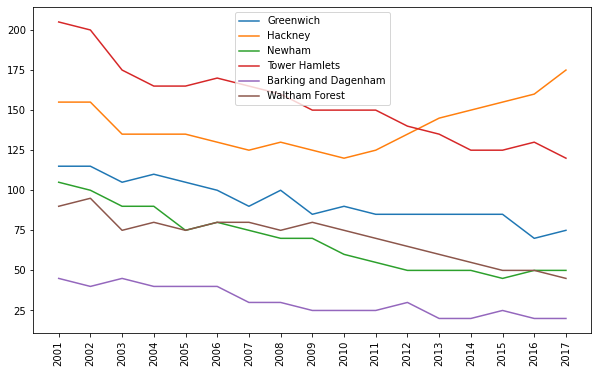

In [7]:
plt.figure(figsize=(10, 6))
plot_boroughs(pubs_units_boroughs)

**Observations:**

## Percentage change (baseline 2005) 

In [8]:
multipliers_2005 = pubs_units[years].div(pubs_units["2005"], axis=0)
percentage_changes_num_2005 = multipliers_2005.sub(1)
percentage_changes_2005 = pd.concat([pubs_units.iloc[:, :2], percentage_changes_num_2005], axis=1)
percentage_changes_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.087739,0.096738,0.019123,0.002250,0.0,-0.024747,-0.033746,-0.052868,-0.094488,-0.124859,-0.151856,-0.151856,-0.175478,-0.186727,-0.173228,-0.186727,-0.205849
1,E09000001,City of London,0.000000,-0.025000,-0.100000,-0.100000,0.0,-0.075000,0.000000,-0.025000,-0.075000,-0.050000,-0.125000,-0.175000,-0.225000,-0.200000,-0.250000,-0.250000,-0.200000
2,E09000002,Barking and Dagenham,0.125000,0.000000,0.125000,0.000000,0.0,0.000000,-0.250000,-0.250000,-0.375000,-0.375000,-0.375000,-0.250000,-0.500000,-0.500000,-0.375000,-0.500000,-0.500000
3,E09000003,Barnet,0.080000,0.080000,0.040000,-0.040000,0.0,-0.040000,-0.080000,-0.040000,-0.120000,-0.240000,-0.240000,-0.240000,-0.320000,-0.280000,-0.240000,-0.200000,-0.360000
4,E09000004,Bexley,-0.095238,-0.095238,-0.095238,-0.047619,0.0,0.000000,0.000000,0.000000,-0.142857,-0.095238,-0.095238,-0.095238,-0.095238,-0.190476,-0.142857,-0.142857,-0.095238


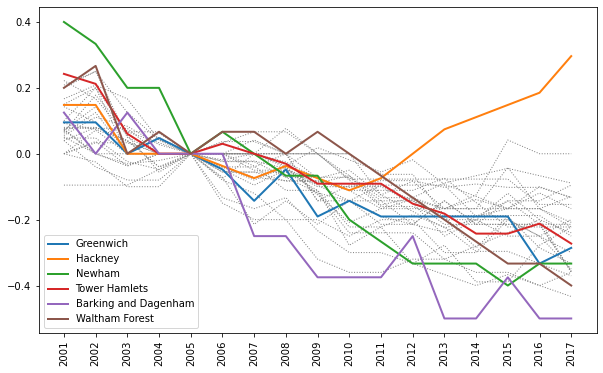

In [9]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_2005)

## Percentage change (baseline 2011)

In [10]:
multipliers_2011 = pubs_units[years].div(pubs_units["2011"], axis=0)
percentage_changes_num_2011 = multipliers_2011.sub(1)
percentage_changes_2011 = pd.concat([pubs_units.iloc[:, :2], percentage_changes_num_2011], axis=1)
percentage_changes_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.282493,0.293103,0.201592,0.181698,0.179045,0.149867,0.139257,0.116711,0.067639,0.031830,0.0,0.000000,-0.027851,-0.041114,-0.025199,-0.041114,-0.063660
1,E09000001,City of London,0.142857,0.114286,0.028571,0.028571,0.142857,0.057143,0.142857,0.114286,0.057143,0.085714,0.0,-0.057143,-0.114286,-0.085714,-0.142857,-0.142857,-0.085714
2,E09000002,Barking and Dagenham,0.800000,0.600000,0.800000,0.600000,0.600000,0.600000,0.200000,0.200000,0.000000,0.000000,0.0,0.200000,-0.200000,-0.200000,0.000000,-0.200000,-0.200000
3,E09000003,Barnet,0.421053,0.421053,0.368421,0.263158,0.315789,0.263158,0.210526,0.263158,0.157895,0.000000,0.0,0.000000,-0.105263,-0.052632,0.000000,0.052632,-0.157895
4,E09000004,Bexley,0.000000,0.000000,0.000000,0.052632,0.105263,0.105263,0.105263,0.105263,-0.052632,0.000000,0.0,0.000000,0.000000,-0.105263,-0.052632,-0.052632,0.000000


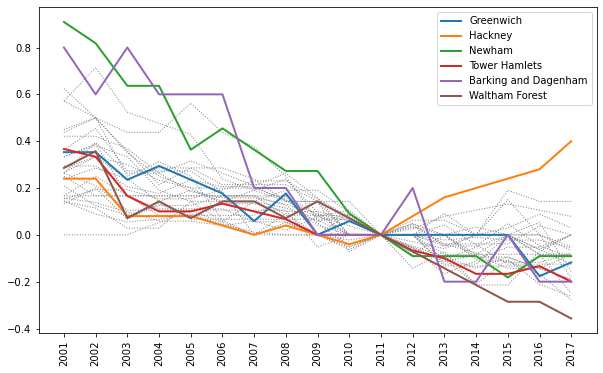

In [11]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_2011)

# Number of pub employees by borough

In [12]:
pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs employment", skiprows=4, names=columns)
pubs_employees_boroughs = pubs_employees[pubs_employees['Area name'].isin(growth_boroughs)]

pubs_employees_boroughs.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,500.0,600.0,500.0,500.0,500.0,400.0,300.0,300.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0
11,E09000011,Greenwich,800.0,800.0,700.0,800.0,600.0,700.0,700.0,700.0,800.0,700.0,1100.0,1000.0,1400.0,900.0,1000.0,900.0,900.0
12,E09000012,Hackney,700.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,900.0,900.0,1000.0,1200.0,1400.0,1700.0,1800.0,1900.0,2000.0
25,E09000025,Newham,600.0,600.0,600.0,600.0,500.0,500.0,500.0,500.0,400.0,400.0,300.0,300.0,600.0,500.0,500.0,500.0,500.0
30,E09000030,Tower Hamlets,1000.0,1200.0,1200.0,1100.0,1300.0,1300.0,1300.0,1300.0,1300.0,1200.0,1400.0,1400.0,1500.0,1500.0,1300.0,1300.0,1200.0


## Aboslute value of growth boroughs

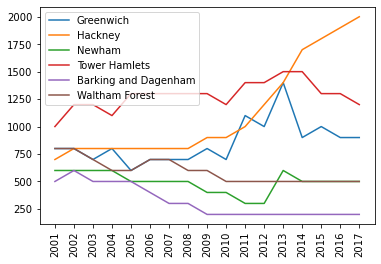

In [13]:
plot_boroughs(pubs_employees_boroughs)

## Percentage change (baseline 2005)

In [14]:
multipliers_emp_2005 = pubs_employees[years].div(pubs_employees["2005"], axis=0)
percentage_changes_num_emp_2005 = multipliers_emp_2005.sub(1)
percentage_changes_emp_2005 = pd.concat([pubs_employees.iloc[:, :2], percentage_changes_num_emp_2005], axis=1)
percentage_changes_emp_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.073048,0.070529,0.035264,0.017632,0.0,0.007557,0.010076,-0.015113,0.012594,-0.030227,-0.012594,0.055416,0.083123,0.118388,0.183879,0.166247,0.168766
1,E09000001,City of London,-0.045455,-0.136364,-0.045455,-0.090909,0.0,-0.090909,-0.045455,-0.045455,0.000000,-0.045455,-0.045455,0.090909,0.045455,0.090909,0.136364,0.045455,0.181818
2,E09000002,Barking and Dagenham,0.000000,0.200000,0.000000,0.000000,0.0,-0.200000,-0.400000,-0.400000,-0.600000,-0.600000,-0.600000,-0.600000,-0.600000,-0.600000,-0.600000,-0.600000,-0.600000
3,E09000003,Barnet,0.272727,0.090909,0.090909,0.000000,0.0,0.181818,0.000000,0.000000,0.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.181818,0.000000,0.000000,-0.090909
4,E09000004,Bexley,0.111111,0.111111,0.111111,0.111111,0.0,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.222222,0.222222,0.333333


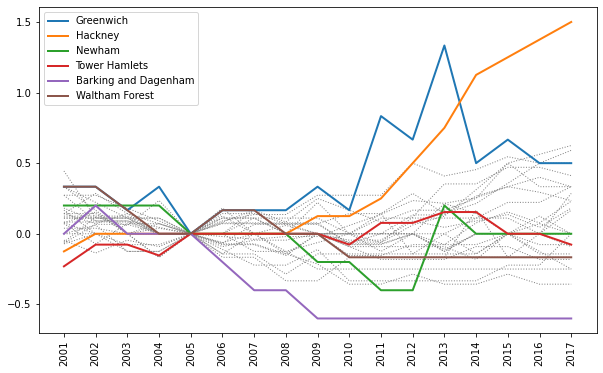

In [15]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_emp_2005)

## Percentage change (baseline 2011)

In [16]:
multipliers_emp_2011 = pubs_employees[years].div(pubs_employees["2011"], axis=0)
percentage_changes_num_emp_2011 = multipliers_emp_2011.sub(1)
percentage_changes_emp_2011 = pd.concat([pubs_employees.iloc[:, :2], percentage_changes_num_emp_2011], axis=1)
percentage_changes_emp_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.086735,0.084184,0.048469,0.030612,0.012755,0.020408,0.022959,-0.002551,0.025510,-0.017857,0.0,0.068878,0.096939,0.132653,0.198980,0.181122,0.183673
1,E09000001,City of London,0.000000,-0.095238,0.000000,-0.047619,0.047619,-0.047619,0.000000,0.000000,0.047619,0.000000,0.0,0.142857,0.095238,0.142857,0.190476,0.095238,0.238095
2,E09000002,Barking and Dagenham,1.500000,2.000000,1.500000,1.500000,1.500000,1.000000,0.500000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,E09000003,Barnet,0.400000,0.200000,0.200000,0.100000,0.100000,0.300000,0.100000,0.100000,0.100000,0.000000,0.0,0.000000,0.000000,-0.100000,0.100000,0.100000,0.000000
4,E09000004,Bexley,0.000000,0.000000,0.000000,0.000000,-0.100000,-0.100000,0.000000,0.000000,0.000000,-0.100000,0.0,0.000000,0.000000,0.000000,0.100000,0.100000,0.200000


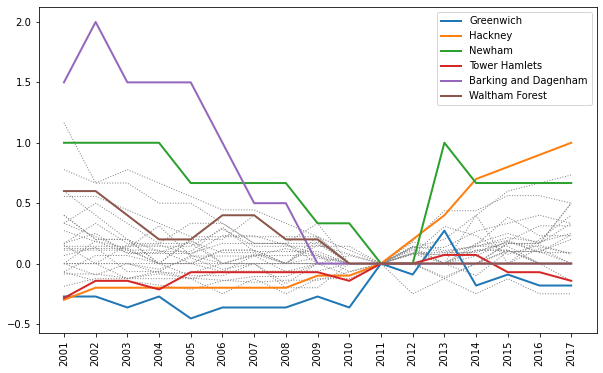

In [17]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_emp_2011)

# Number of small public houses and bars by borough


In [18]:
small_pubs = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs units", skiprows=4, names=columns)
small_pubs_boroughs = small_pubs[small_pubs['Area name'].isin(growth_boroughs)]

small_pubs_boroughs.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,30.0,25.0,30.0,25.0,30.0,25.0,15.0,20.0,20.0,20.0,15.0,20.0,15.0,15.0,15.0,15.0,15.0
11,E09000011,Greenwich,90.0,90.0,85.0,90.0,85.0,80.0,65.0,70.0,60.0,65.0,55.0,55.0,50.0,55.0,50.0,40.0,45.0
12,E09000012,Hackney,145.0,140.0,120.0,120.0,110.0,105.0,100.0,110.0,100.0,100.0,95.0,100.0,95.0,90.0,90.0,85.0,100.0
25,E09000025,Newham,90.0,90.0,80.0,75.0,60.0,65.0,65.0,60.0,55.0,45.0,45.0,45.0,35.0,40.0,35.0,40.0,35.0
30,E09000030,Tower Hamlets,180.0,175.0,145.0,140.0,135.0,130.0,130.0,125.0,115.0,115.0,110.0,95.0,90.0,85.0,80.0,85.0,80.0


## Absolute value of growth boroughs

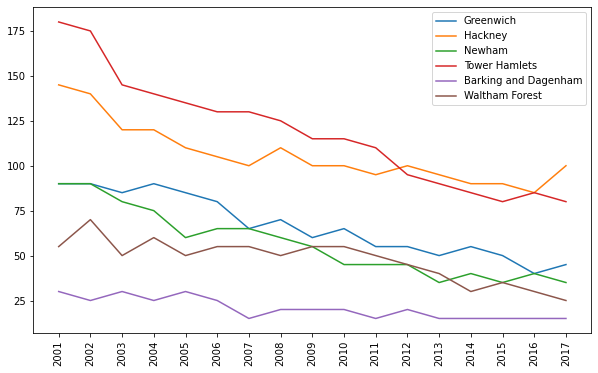

In [19]:
plt.figure(figsize=(10, 6))
plot_boroughs(small_pubs_boroughs)

## Percent change (baseline 2005)

In [20]:
multipliers_sm_2005 = small_pubs[years].div(small_pubs["2005"], axis=0)
percentage_changes_num_sm_2005 = multipliers_sm_2005.sub(1)
percentage_changes_sm_2005 = pd.concat([small_pubs.iloc[:, :2], percentage_changes_num_sm_2005], axis=1)
percentage_changes_sm_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.124378,0.149254,0.034826,0.021559,0.0,-0.036484,-0.072968,-0.087894,-0.152570,-0.190713,-0.230514,-0.265340,-0.328358,-0.378109,-0.383085,-0.412935,-0.442786
1,E09000001,City of London,-0.043478,0.043478,-0.217391,-0.173913,0.0,-0.086957,0.043478,-0.043478,-0.217391,-0.173913,-0.304348,-0.434783,-0.478261,-0.521739,-0.565217,-0.608696,-0.608696
2,E09000002,Barking and Dagenham,0.000000,-0.166667,0.000000,-0.166667,0.0,-0.166667,-0.500000,-0.333333,-0.333333,-0.333333,-0.500000,-0.333333,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000
3,E09000003,Barnet,0.187500,0.125000,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,-0.062500,-0.250000,-0.250000,-0.250000,-0.312500,-0.250000,-0.250000,-0.250000,-0.437500
4,E09000004,Bexley,-0.266667,-0.200000,-0.200000,-0.133333,0.0,0.000000,-0.066667,0.000000,-0.266667,-0.200000,-0.133333,-0.200000,-0.133333,-0.333333,-0.266667,-0.266667,-0.266667


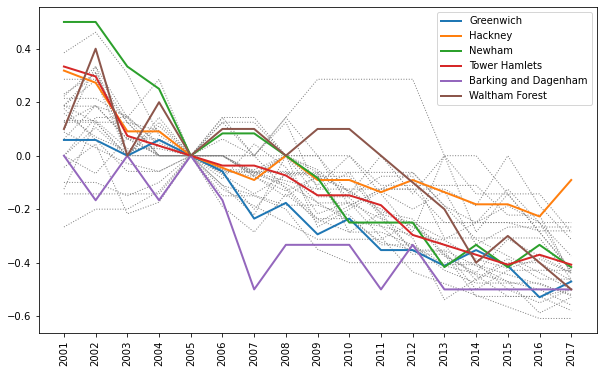

In [21]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_sm_2005)

## Percent change (baseline 2011)

In [22]:
multipliers_sm_2011 = small_pubs[years].div(small_pubs["2011"], axis=0)
percentage_changes_num_sm_2011 = multipliers_sm_2011.sub(1)
percentage_changes_sm_2011 = pd.concat([small_pubs.iloc[:, :2], percentage_changes_num_sm_2011], axis=1)
percentage_changes_sm_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.461207,0.493534,0.344828,0.327586,0.299569,0.252155,0.204741,0.185345,0.101293,0.051724,0.0,-0.045259,-0.127155,-0.191810,-0.198276,-0.237069,-0.275862
1,E09000001,City of London,0.375000,0.500000,0.125000,0.187500,0.437500,0.312500,0.500000,0.375000,0.125000,0.187500,0.0,-0.187500,-0.250000,-0.312500,-0.375000,-0.437500,-0.437500
2,E09000002,Barking and Dagenham,1.000000,0.666667,1.000000,0.666667,1.000000,0.666667,0.000000,0.333333,0.333333,0.333333,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
3,E09000003,Barnet,0.583333,0.500000,0.500000,0.333333,0.333333,0.333333,0.333333,0.333333,0.250000,0.000000,0.0,0.000000,-0.083333,0.000000,0.000000,0.000000,-0.250000
4,E09000004,Bexley,-0.153846,-0.076923,-0.076923,0.000000,0.153846,0.153846,0.076923,0.153846,-0.153846,-0.076923,0.0,-0.076923,0.000000,-0.230769,-0.153846,-0.153846,-0.153846


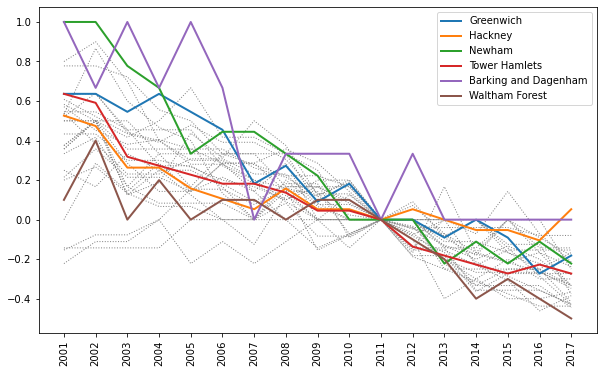

In [23]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_sm_2011)

# Number of employees of small pubs by borough

In [24]:
small_pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs employment", skiprows=4, names=columns)

small_pubs_employees.dropna(inplace=True)
small_pubs_employees = small_pubs_employees[~small_pubs_employees['Area name'].isin(['Barking and Dagenham','Merton']) ]

small_pubs_employees_boroughs = small_pubs_employees[small_pubs_employees['Area name'].isin(growth_boroughs)]
small_pubs_employees_boroughs.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
11,E09000011,Greenwich,400.0,400.0,400.0,400.0,300.0,300.0,300.0,300.0,200.0,200,200,200,200,200.0,200.0,200,200
12,E09000012,Hackney,500.0,500.0,500.0,400.0,400.0,400.0,400.0,400.0,400.0,400,400,400,400,400.0,400.0,400,400
25,E09000025,Newham,400.0,400.0,300.0,300.0,200.0,200.0,200.0,200.0,200.0,200,200,200,100,100.0,100.0,100,100
30,E09000030,Tower Hamlets,600.0,600.0,600.0,500.0,500.0,500.0,500.0,500.0,400.0,400,400,400,400,300.0,300.0,400,300
31,E09000031,Waltham Forest,300.0,400.0,200.0,300.0,200.0,300.0,200.0,200.0,200.0,200,200,200,200,100.0,100.0,100,100


## Absolute value of growth boroughs

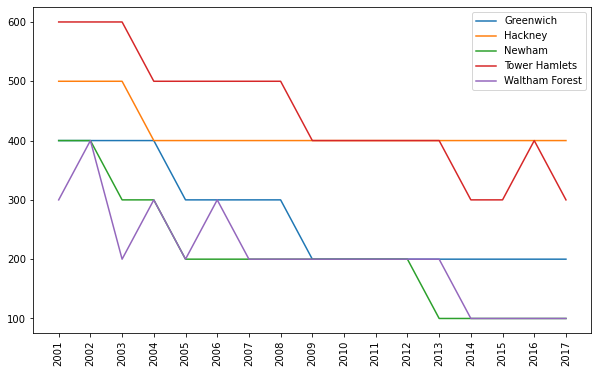

In [25]:
plt.figure(figsize=(10, 6))
plot_boroughs(small_pubs_employees_boroughs)

## Percentage change (baseline 2005)

In [26]:
multipliers_sm_emp_2005 = small_pubs_employees[years].div(small_pubs_employees["2005"], axis=0)
percentage_changes_num_sm_emp_2005 = multipliers_sm_emp_2005.sub(1)
percentage_changes_sm_emp_2005 = pd.concat([small_pubs_employees.iloc[:, :2], percentage_changes_num_sm_emp_2005], axis=1)
percentage_changes_sm_emp_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.224638,0.210145,0.086957,0.043478,0.0,-0.050725,-0.086957,-0.130435,-0.188406,-0.23913,-0.275362,-0.289855,-0.333333,-0.376812,-0.391304,-0.427536,-0.456522
1,E09000001,City of London,-0.142857,0.000000,-0.285714,-0.285714,0.0,-0.142857,0.000000,-0.142857,-0.285714,-0.285714,-0.428571,-0.571429,-0.428571,-0.571429,-0.571429,-0.571429,-0.571429
3,E09000003,Barnet,0.250000,0.250000,0.250000,0.000000,0.0,0.000000,-0.250000,-0.250000,-0.250000,-0.5,-0.25,-0.25,-0.5,-0.500000,-0.250000,-0.25,-0.5
4,E09000004,Bexley,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.333333,0,0,-0.333333,0,-0.333333,-0.333333,-0.333333,-0.333333
5,E09000005,Brent,0.333333,0.333333,0.333333,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,-0.333333,-0.333333,-0.333333,-0.333333


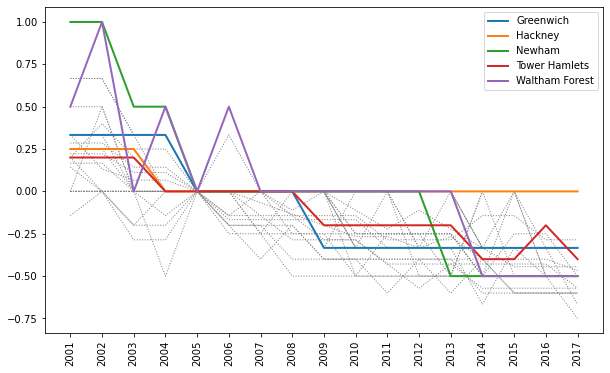

In [27]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_sm_emp_2005)

## Percentage change (baseline 2011)

In [28]:
multipliers_sm_emp_2011 = small_pubs_employees[years].div(small_pubs_employees["2011"], axis=0)
percentage_changes_num_sm_emp_2011 = multipliers_sm_emp_2011.sub(1)
percentage_changes_sm_emp_2011 = pd.concat([small_pubs_employees.iloc[:, :2], percentage_changes_num_sm_emp_2011], axis=1)
percentage_changes_sm_emp_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.69,0.67,0.5,0.44,0.38,0.31,0.26,0.2,0.12,0.05,0,-0.02,-0.08,-0.14,-0.16,-0.21,-0.25
1,E09000001,City of London,0.5,0.75,0.25,0.25,0.75,0.5,0.75,0.5,0.25,0.25,0,-0.25,0,-0.25,-0.25,-0.25,-0.25
3,E09000003,Barnet,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0,0,0,-0.333333,0,0,-0.333333,-0.333333,0,0,-0.333333
4,E09000004,Bexley,0,0,0,0,0,0,0,0,-0.333333,0,0,-0.333333,0,-0.333333,-0.333333,-0.333333,-0.333333
5,E09000005,Brent,0.333333,0.333333,0.333333,0.333333,0,0,0,0,0,0,0,0,0,-0.333333,-0.333333,-0.333333,-0.333333


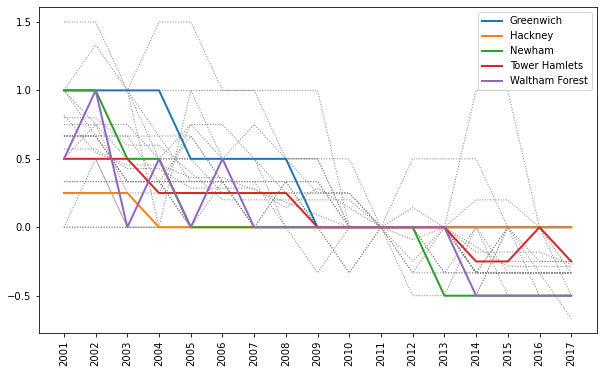

In [29]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_sm_emp_2011)